<a href="https://colab.research.google.com/github/taceroc/DSPS_TAcero/blob/main/HW4/Copy_of_Copy_of_MWrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by federica b bianco @fedhere
for UDel DSPS PHYS 467/667

# testing the significance of Dark Matter

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt


#package I will use for constants and units conversion 
import astropy
from astropy import units as u

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v\propto\frac{1}/{r}$

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2} 
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 + 
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework: 
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass of (the center for simplicity) the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Derive this $v^2\propto\frac{1}{r}$ from Newton's law $F~=~\frac{GMm}{r^2}$. Write each formula and describe each step. You can use latex (you really just need to know ```\frac{}``` and ```^```) and this reference
https://www.physicsclassroom.com/calcpad/circgrav

For bodies in orbit around a central source (like the Sun or the Earth), there is a equilibrium between the gravitational force (push the body to the central source) and the centrifugal force (due to the velocity of the body).

\begin{align}
  |F_N| &= |F_c|\\
  \frac{GMm}{r^2} &= \frac{mv^2}{r}\\
  \frac{GM}{r} &= v^2
\end{align}


## M31 rotational curve

# Galaxy Rotational Curves
The data comes from [SOFUE 2015](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/2015-pasj-M31MW-DH.pdf)
The data are plotted in Figure 3 and 4 for M31 and the Milky Way respectively, and hosted on [this website](http://www.ioa.s.u-tokyo.ac.jp/~sofue/htdocs/2015m31/)
As described in the paper: 
Long and short bars represent modified standard deviations and errors, respectively

#### Please read the last paragraphs of Section 2.1 of the paper to understand the meaning of these uncertainties:

![figures](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/figures.png?raw=1)





![text](https://github.com/fedhere/DSPS_FBianco/blob/master/HW4/text.png?raw=1)

### data ingestion
Get the data from the github repository https://github.com/fedhere/DSPS/tree/master/HW4 : there are 2 files: mw.csv and m31.csv. Start with M31, the Andromeda galaxy, Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty is the propagation of the uncertainty in the location of the HII line. The uncertainty called ```err``` if the full error budget:  including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [2]:
m31 = pd.read_csv("https://github.com/fedhere/DSPS_FBianco/raw/master/HW4/m31.csv", header = 1)
m31.rename(columns = {"#R(kpc":"r(kpc)","V(km/s)": "v(km/s)", "St.dev.": "dv", "St.error": "err"}, inplace = True)
m31.head()

,r(kpc),v(km/s),dv,err
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [3]:
m31.describe()

,r(kpc),v(km/s),dv,err
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size
   
 

In [4]:
# apparentSizeM31 = 67450  / 1000 #kpc
# dapparentSizeM31 = 920 / 1000 #kpc
apparentSizeM31 = ((3.167 * 1) * u.degree)
print("Angular Size of the visible component of Andromeda: {:.5f}".format(apparentSizeM31.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.05527 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [5]:
# -- diameter
distanceM31 = (1.606E11 * u.au).to(u.pc).value / 1000 #kpc
ddistanceM31 = (1.0E9 * u.au).to(u.pc).value  /1000 #kpc

In [6]:
print('Size of the visible component of Andromeda: {:.2f} \pm {:.2f} kpc'.format(distanceM31,ddistanceM31 ) )

Size of the visible component of Andromeda: 778.61 \pm 4.85 kpc


Print the distance like I printed the angular size. 

To get the physical size of the visible component of andtomeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles 


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc). 


In [7]:
physicalsize = distanceM31 * np.sin(apparentSizeM31.to(u.rad))
dphysicalsize = ddistanceM31 * np.sin(apparentSizeM31.to(u.rad))

print(r"Physical size of the visible component of Andromeda: {:.2f} \pm {:.2f} kpc".format(physicalsize,dphysicalsize ) )

Physical size of the visible component of Andromeda: 43.02 \pm 0.27 kpc


### find the first measurement  in your data table that includes all the luminous mass. 

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

We expect the velocity to decrease as 1/r if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor 2 slower, three times as far a factor 3 slower. 

write a function that 

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy, 

2. takes as arguments:
    - the data and 
    - N 
    - the size of the luminous component of the galaxy
 
2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [8]:
def getradii(gal, gsize, n):
  '''
    gal: dataframe with 4 columns with the data of velocity and radii of the galaxy
    gsize: the diameter
    n: number of radius

    return:
      radii in kpc, uncertainity of r, velocity in km/s, err and dv
  '''
  # -- two times the radii
  rx2 = gal[(gal["r(kpc)"] >= gsize[0])].iloc[0]
  # -- the radii
  r = gal[(gal["r(kpc)"] <= rx2["r(kpc)"]/2)].iloc[-1]
  # -- n times the radii
  rx3 = gal[(gal["r(kpc)"] <= n*rx2["r(kpc)"]/2)].iloc[-1]

  if n == 1:
    return r["r(kpc)"], gsize[1]/2, r["v(km/s)"], r["err"], r["dv"]
  if n == 2:
    return rx2["r(kpc)"], gsize[1], rx2["v(km/s)"], rx2["err"], rx2["dv"]
  else:
    return rx3["r(kpc)"], gsize[1]*n/2, rx3["v(km/s)"], rx3["err"], rx3["dv"]

  #   index = np.argmin(gal["r(kpc)"].to_numpy())
  # return gal["r(kpc)"].min(), gal.iloc[index]["err"], gal.iloc[index]["v(km/s)"], gal.iloc[index]["dv"]
# -- uncertainity of the radius ?

In [9]:
results_ = getradii(m31, [physicalsize, dphysicalsize], 3)

In [10]:
print("r = {:.3f}  \pm {:.3f} kpc \nv = {:.3f} \pm dv = {:.3f} err = {:.3f} km/s".format(results_[0],results_[1], results_[2],results_[3],results_[4]))

r = 70.880  \pm 0.402 kpc 
v = 218.489 \pm dv = 24.657 err = 132.355 km/s


### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line)

2. each velocity as an errorbar with error equal to err in the same color as the line in 1

3. each velocity as an errorbar with error equal to dv in  the same color but a different line thickness


4. the datapoint corresponding to N=1, 2, 3 each in a different color. 

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()```)

7. limit the x axis to the "relevant" portion of the data

In [11]:
def plotGal(gal, rds):
  '''
    gal: dataframe with 4 columns with the data of velocity and radii of the galaxy
    rds: radii, take into account that function getradii has the diameter parameter and not radii

    return:
      A plot of v vs r with error bars, marking the respective radii for N =1,2,3
  '''
  plt.errorbar(gal["r(kpc)"], gal["v(km/s)"], gal["dv"], label = "v", color = "blue", alpha = 0.5)
  plt.errorbar(gal["r(kpc)"], gal["v(km/s)"], gal["err"], elinewidth=4, color = "blue", alpha = 0.5)
  plt.errorbar(getradii(gal, rds*2, 1)[0], getradii(gal, rds*2, 1)[2], getradii(gal, rds*2, 1)[4], 
              color="red", label = "r")
  plt.errorbar(getradii(gal, rds*2, 2)[0], getradii(gal, rds*2, 2)[2], getradii(gal, rds*2, 2)[4], 
              color="purple", label = "2xr")
  plt.errorbar(getradii(gal, rds*2, 3)[0], getradii(gal, rds*2, 3)[2], getradii(gal, rds*2, 3)[4], 
              color="green", label = "3xr")
  plt.text(getradii(gal, rds*2, 1)[0], getradii(gal, rds*2, 1)[2] - 4*getradii(gal, rds*2, 1)[4], "{:.1f}\n({:.1f}, {:.1f})".format(getradii(gal, rds*2, 1)[2],
                                                                                          getradii(gal, rds*2, 1)[4],getradii(gal, rds*2, 1)[3]),horizontalalignment='center',verticalalignment='center')
  plt.text(getradii(gal, rds*2, 2)[0], getradii(gal, rds*2, 2)[2] - 1.3*getradii(gal, rds*2, 2)[4], "{:.1f}\n({:.1f}, {:.1f})".format(getradii(gal, rds*2, 2)[2],
                                                                                          getradii(gal, rds*2, 2)[4],getradii(gal, rds*2, 2)[3]),horizontalalignment='center',verticalalignment='center')

  plt.text(getradii(gal, rds*2, 3)[0], getradii(gal, rds*2, 3)[2] - 1.2*getradii(gal, rds*2, 3)[4], "{:.1f}\n({:.1f}, {:.1f})".format(getradii(gal, rds*2, 3)[2],
                                                                                          getradii(gal, rds*2, 3)[4],getradii(gal, rds*2, 3)[3]),horizontalalignment='center',verticalalignment='center')

  plt.xlim(0,85)
  plt.xlabel("r(kpc)")
  plt.ylabel("v(km/s)")
  plt.legend()

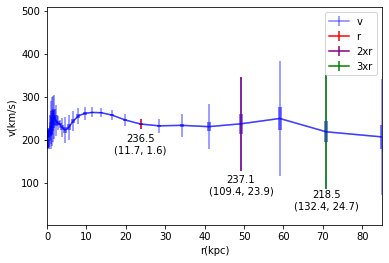

In [12]:
plotGal(m31, np.array([physicalsize/2,dphysicalsize/2]) )

### **Figure**: Velocity of the galaxy in km/s vs the distance from the center of the galaxy. With their respective error bars. The red vertical line indicates the radius of the visible galaxy, purple is 2 times that radius and green 3 times. Below every line is the velocity and the errors.

Write a function that for a given dataset and a given luminous radius and a given N 
  
  1) uses the function above to find the radius at least as large as needed and the velocity at that radius, 
  
  2) states the expected drop in rotational velocities according to Newton's law $v^2\propto 1/r$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties, 
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v^2 \propto 1/r$
  
Your function should print 

     - the expected ratio based on the radii, 
     - the calculated ratio using ```dv```, and its uncertainty, - 
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio, 
  5) and the same using ```err```  instead of ```dv```

\begin{align}
&v^2 \propto \frac{1}{r}\\
&v^2 = \frac{A}{r}, \text{A is a constant}.
\end{align}
The ratio between a system denoted as 1 and another denoted 2:
\begin{align}
&v_1^2 = \frac{A}{r_1}; v_2^2 = \frac{A}{r_2}\\
&\frac{r_1}{r_2} = \frac{v_2^2}{v_1^2}
\end{align}

The uncertainity for the ratio of the velocities square:

\begin{align}
  dV = \frac{v_1^2}{v_2^2} \sqrt{\left(\frac{2v_1dv_1}{v_1^2}\right) ^ 2 + \left(\frac{2v_2dv_2}{v_2^2}\right) ^ 2} = \frac{v_1^2}{v_2^2} \sqrt{\left(\frac{2dv_1}{v_1}\right) ^ 2 + \left(\frac{2dv_2}{v_2}\right) ^ 2}
\end{align}

In [32]:
def vratios(gal, rds, n, err='dv'):
  '''
    
  '''
  # -- dv corresponds to std
  values_ = getradii(gal, rds*2, n)
  # -- expected ratio using the radii
  expected_r = getradii(gal, rds*2, 1)[0] / values_[0]
  expected_dr = abs(getradii(gal, rds*2, 1)[0] / values_[0]) * np.sqrt( (getradii(gal, rds*2, 1)[1] / getradii(gal, rds*2, 1)[0])**2 + 
                                                                    (values_[1] / values_[0])**2 )
  # -- observed ratio using the velocities
  obs_v =  values_[2]**2 / getradii(gal, rds*2, 1)[2]**2
  if err == 'dv':
    err_n = 4
    obs_dv = (values_[2]**2 / getradii(gal, rds*2, 1)[2]**2 ) * np.sqrt( ( 2*getradii(gal, rds*2, 1)[err_n] / getradii(gal, rds*2, 1)[2])**2 + 
                                                                    (2 * values_[err_n] / values_[2])**2 )
  if err == 'err':
    err_n = 3
    obs_dv = (values_[2]**2 / getradii(gal, rds*2, 1)[2]**2 ) * np.sqrt( ( 2* getradii(gal, rds*2, 1)[err_n] / getradii(gal, rds*2, 1)[2])**2 + 
                                                                    (2 * values_[err_n] / values_[2])**2 )
  twosigmaplus = obs_v + 2*obs_dv
  twosigmaminu = obs_v - 2*obs_dv

  if ((expected_r + expected_dr >=  twosigmaminu) & (expected_r + expected_dr <=  twosigmaplus)):
    print("yes, the expected ratio is within the 2 sigma calculated ratio")
  else:
    print("no, the expected ratio is not within the 2 sigma calculated ratio")

  return expected_r, expected_dr, obs_v, obs_dv, twosigmaplus, twosigmaminu



In [38]:
m31_res = vratios(m31, np.array([physicalsize, dphysicalsize])/2, 3, err='dv')
print("Expected ratio using radii = {:.3f} \pm {:.3f}\nCalculted ratio using velocities = {:.3f} \pm {:.3f}\n\
velo + 2sigma = {:.3f}\nvelo - 2sigma = {:.3f}\n".format(m31_res[0], m31_res[1], m31_res[2], m31_res[3], m31_res[4], m31_res[5]))

yes, the expected ratio is within the 2 sigma calculated ratio
Expected ratio using radii = 0.335 \pm 0.003
Calculted ratio using velocities = 0.853 \pm 1.037
velo + 2sigma = 2.928
velo - 2sigma = -1.221



In [36]:
m31_res = vratios(m31, np.array([physicalsize, dphysicalsize])/2, 3, err='err')
print("Expected ratio using radii = {:.3f} \pm {:.3f}\nCalculted ratio using velocities = {:.3f} \pm {:.3f}\n\
velo + 2sigma = {:.3f}\nvelo - 2sigma = {:.3f}\n".format(m31_res[0], m31_res[1], m31_res[2], m31_res[3], m31_res[4], m31_res[5]))

no, the expected ratio is not within the 2 sigma calculated ratio
Expected ratio using radii = 0.335 \pm 0.003
Calculted ratio using velocities = 0.853 \pm 0.193
velo + 2sigma = 1.239
velo - 2sigma = 0.467



### Discuss!

Something is off because the uncertainity for 'dv' is greater than the value itself! for greater Ns, but I not sure because 'dv' is very a large uncertainity and the propagation due to the mathematical operations (the ratio) increaze even more the number.

## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

# Milky way

In [39]:
mw = pd.read_csv("https://github.com/fedhere/DSPS_FBianco/raw/master/HW4/mw.csv", header = 1)
mw.rename(columns = {"R(kpc)":"r(kpc)","V(km/s)": "v(km/s)", "St.dev.": "dv", "St.error": "err"}, inplace = True)
mw.head()

,r(kpc),v(km/s),dv,err
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [40]:
distancemw1 = 7.86 #kpc
distancemw2 = 8.32 #kpc

distancemw = np.mean((distancemw1,distancemw2))
ddistancemw = np.std((distancemw1,distancemw2))

sizemw = 57 #+ 580  #kpc
dsizemw = 5 #+ 120  #kpc

angularsizemw = np.arctan(sizemw / distancemw) 

angularsizemw = angularsizemw * u.rad
angularsizemw

<Quantity 1.42980816 rad>

In [41]:
# apparentSizemw = ((angularsizemw).to(u.degree))
print("Angular Size of the visible component of the Milky Way: {:.5f}".format(angularsizemw.to(u.rad)  ))

Angular Size of the visible component of the Milky Way: 1.42981 rad


In [42]:
print('Size of the visible component of the Milky Way: {:.2f} \pm {:.2f} kpc'.format(sizemw,dsizemw ) )

Size of the visible component of the Milky Way: 57.00 \pm 5.00 kpc


In [43]:
physicalsizemw = sizemw * np.sin(angularsizemw.to(u.rad) )
dphysicalsizemw = dsizemw * np.sin(angularsizemw.to(u.rad) )

print(r"Physical size of the visible component of the Milky Way: {:.2f} \pm {:.2f} kpc".format(physicalsizemw,dphysicalsizemw ) )

Physical size of the visible component of the Milky Way: 56.43 \pm 4.95 kpc


In [44]:
results_ = getradii(mw, [sizemw, dsizemw], 3)

In [45]:
print("r = {:.3f}  \pm {:.3f} kpc \nv = {:.3f} \pm dv = {:.3f} err = {:.3f} km/s".format(results_[0],results_[1], results_[2],results_[3],results_[4]))

r = 91.005  \pm 7.500 kpc 
v = 179.697 \pm dv = 20.907 err = 62.587 km/s


In [46]:
def plotGalmw(gal, rds):
  plt.errorbar(gal["r(kpc)"], gal["v(km/s)"], gal["dv"], label = "v", color = "blue", alpha = 0.5)
  plt.errorbar(gal["r(kpc)"], gal["v(km/s)"], gal["err"], elinewidth=4, color = "blue", alpha = 0.5)
  plt.errorbar(getradii(gal, rds*2, 1)[0], getradii(gal, rds*2, 1)[2], getradii(gal, rds*2, 1)[4], 
              color="red", label = "r")
  plt.errorbar(getradii(gal, rds*2, 2)[0], getradii(gal, rds*2, 2)[2], getradii(gal, rds*2, 2)[4], 
              color="purple", label = "2xr")
  plt.errorbar(getradii(gal, rds*2, 3)[0], getradii(gal, rds*2, 3)[2], getradii(gal, rds*2, 3)[4], 
              color="green", label = "3xr")
  plt.text(getradii(gal, rds*2, 1)[0], getradii(gal, rds*2, 1)[2] - 2*getradii(gal, rds*2, 1)[4], "{:.1f}\n({:.1f}, {:.1f})".format(getradii(gal, rds*2, 1)[2],
                                                                                          getradii(gal, rds*2, 1)[4],getradii(gal, rds*2, 1)[3]),horizontalalignment='center',verticalalignment='center')
  plt.text(getradii(gal, rds*2, 2)[0], getradii(gal, rds*2, 2)[2] - 1.8*getradii(gal, rds*2, 2)[4], "{:.1f}\n({:.1f}, {:.1f})".format(getradii(gal, rds*2, 2)[2],
                                                                                          getradii(gal, rds*2, 2)[4],getradii(gal, rds*2, 2)[3]),horizontalalignment='center',verticalalignment='center')

  plt.text(getradii(gal, rds*2, 3)[0], getradii(gal, rds*2, 3)[2] - 1.5*getradii(gal, rds*2, 3)[4], "{:.1f}\n({:.1f}, {:.1f})".format(getradii(gal, rds*2, 3)[2],
                                                                                          getradii(gal, rds*2, 3)[4],getradii(gal, rds*2, 3)[3]),horizontalalignment='center',verticalalignment='center')

  plt.xlim(0,150)
  plt.xlabel("r(kpc)")
  plt.ylabel("v(km/s)")
  plt.legend()

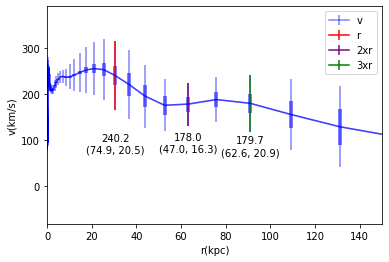

In [47]:
plotGalmw(mw, np.array([sizemw/2,dsizemw/2]) )

### **Figure**: Velocity of the galaxy in km/s vs the distance from the center of the galaxy. With their respective error bars. The red vertical line indicates the radius of the visible galaxy, purple is 2 times that radius and green 3 times. Below every line is the velocity and the errors.

In [48]:
mw_res = vratios(mw, np.array([sizemw, dsizemw])/2, 2, err='dv')
print("Expected ratio using radii = {:.3f} \pm {:.3f}\nCalculted ratio using velocities = {:.3f} \pm {:.3f}\n\
velo + 2sigma = {:.3f}\nvelo - 2sigma = {:.3f}\n".format(mw_res[0], mw_res[1], mw_res[2], mw_res[3], mw_res[4], mw_res[5]))

yes, the expected ratio is within the 2 sigma calculated ratio
Expected ratio using radii = 0.482 \pm 0.055
Calculted ratio using velocities = 0.549 \pm 0.449
velo + 2sigma = 1.447
velo - 2sigma = -0.348



In [54]:
mw_res = vratios(mw, np.array([sizemw, dsizemw])/2, 2, err='err')
print("Expected ratio using radii = {:.3f} \pm {:.3f}\nCalculted ratio using velocities = {:.3f} \pm {:.3f}\n\
velo + 2sigma = {:.3f}\nvelo - 2sigma = {:.3f}\n".format(mw_res[0], mw_res[1], mw_res[2], mw_res[3], mw_res[4], mw_res[5]))

yes, the expected ratio is within the 2 sigma calculated ratio
Expected ratio using radii = 0.482 \pm 0.055
Calculted ratio using velocities = 0.549 \pm 0.138
velo + 2sigma = 0.825
velo - 2sigma = 0.274



I think the answer should be "NO" because we know that there is no agreement between newtonian statement and the observations... I think the parameters of the galaxy are no correct